<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-06-12 09:54:38--  https://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt.3’

data3.txt.3         100%[===================>] 174.70K  --.-KB/s    in 0.08s   

2020-06-12 09:54:38 (2.20 MB/s) - ‘data3.txt.3’ saved [178891/178891]

data3.txt  data3.txt.1	data3.txt.2  data3.txt.3  sample_data
Slope:  [[ 6.34826082e-07  6.52316668e-16 -2.21298109e-08]]
Intercept:  [-0.50187066]


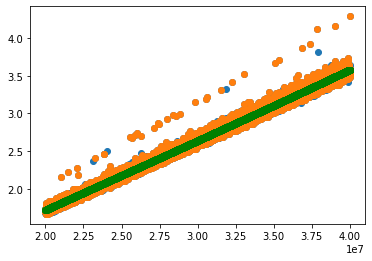

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
!wget https://cs.uit.edu.vn/data3.txt
!ls
data=pd.read_csv('data3.txt',header=None)
data.columns=['Complexity','Timing']
plt.scatter(data['Complexity'],data['Timing'])
data=data.assign(Square=np.power(data['Complexity'],2),Logarit=np.log2(data['Complexity'],where=(data['Complexity']!=0))*data['Complexity'])
data=data[['Complexity','Square','Logarit','Timing']]
x=data[['Complexity','Square','Logarit']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)
model=LinearRegression().fit(X_train.values,y_train.values)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train.values)
plt.scatter(X_train['Complexity'],y_train)
plt.plot(X_train['Complexity'],y_fit,'go')

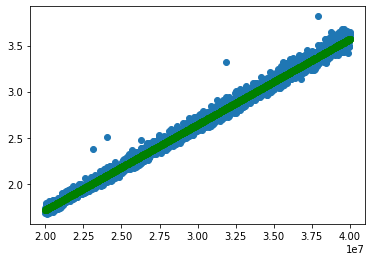

In [11]:
y_predict=model.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,'go')

In [12]:
print(model.score(y_test,y_predict))
r2_score(y_test, y_predict)


-27.025375308354942


0.9897290008911028

Kết quả tệ hơn vì hệ số xác định R^2 square thấp hơn so với Round2(-3)

Vấn đề ở đây là có quá nhiều điểm dữ liệu phân tán so với model xây dựng được trên bộ dữ liệu

Xây dựng model mới với việc thêm 2 biết là nlog2n và nsquare